In [1]:
include("IsingSpinGlassCore.jl")
using .IsingSpinGlassCore
using CairoMakie

In [5]:
L = 6
move = IsingSpinGlassCore.joint_metropolis_sampler
Jx, Jy, Jz = IsingSpinGlassCore.initial_couplings(L; dist=:uniform)
num_replicas=32
T_min=0.5; T_max=2.5
eqSteps=10^6; mcSteps=10^3
state = IsingSpinGlassCore.initial_state(L)
println("Jx: $Jx")
println("Jy: $Jy")
println("Jz: $Jz")
println("init state: $state")
println("Finished to set hyper parameters.")

Jx: [-1.0 -1.0 -1.0 1.0 1.0 1.0; -1.0 -1.0 1.0 -1.0 1.0 -1.0; 1.0 -1.0 -1.0 1.0 -1.0 1.0; -1.0 1.0 1.0 -1.0 1.0 -1.0; 1.0 -1.0 -1.0 -1.0 -1.0 1.0; 1.0 1.0 1.0 -1.0 1.0 -1.0;;; 1.0 -1.0 -1.0 1.0 -1.0 -1.0; 1.0 1.0 1.0 1.0 -1.0 1.0; 1.0 -1.0 -1.0 1.0 -1.0 1.0; 1.0 1.0 -1.0 -1.0 -1.0 1.0; -1.0 1.0 1.0 -1.0 1.0 -1.0; -1.0 1.0 1.0 1.0 -1.0 1.0;;; 1.0 -1.0 1.0 -1.0 -1.0 1.0; -1.0 1.0 -1.0 -1.0 1.0 -1.0; 1.0 -1.0 -1.0 1.0 -1.0 1.0; -1.0 1.0 -1.0 1.0 -1.0 1.0; 1.0 -1.0 1.0 1.0 1.0 1.0; 1.0 1.0 1.0 1.0 -1.0 -1.0;;; -1.0 -1.0 1.0 -1.0 1.0 1.0; -1.0 -1.0 1.0 1.0 1.0 -1.0; -1.0 -1.0 -1.0 -1.0 -1.0 -1.0; 1.0 -1.0 -1.0 1.0 -1.0 -1.0; 1.0 1.0 -1.0 1.0 1.0 1.0; -1.0 1.0 1.0 1.0 -1.0 1.0;;; -1.0 1.0 -1.0 -1.0 -1.0 1.0; 1.0 -1.0 1.0 -1.0 1.0 1.0; 1.0 1.0 1.0 1.0 1.0 1.0; -1.0 -1.0 -1.0 1.0 1.0 -1.0; -1.0 1.0 -1.0 -1.0 1.0 1.0; -1.0 -1.0 -1.0 -1.0 1.0 -1.0;;; 1.0 -1.0 1.0 -1.0 -1.0 -1.0; 1.0 -1.0 1.0 -1.0 1.0 -1.0; -1.0 1.0 -1.0 1.0 -1.0 1.0; 1.0 -1.0 -1.0 -1.0 -1.0 1.0; 1.0 1.0 1.0 -1.0 1.0 -1.0; -1.0 -

In [6]:
T_replicas, E, C, q_avg, Binder, χ_SG, q_values, exchange_prob_means = IsingSpinGlassCore.ising_spin_glass_model(L, state, move, Jx, Jy, Jz; num_replicas=num_replicas, T_min=T_min, T_max=T_max, eqSteps=eqSteps, mcSteps=mcSteps)

([0.5, 0.5266443433636452, 0.55470852879385, 0.5842682178097016, 0.615403103833275, 0.6481971270444485, 0.6827387006850498, 0.7191209494224527, 0.7574419604152575, 0.7978050477579308  …  1.5667988107030266, 1.6502914616912716, 1.73823332640206, 1.830861497591635, 1.9284257023778533, 2.031188975508722, 2.139428368508532, 2.253435696613461, 2.3735183255103887, 2.499999999999995], [-169.648, -165.548, -167.804, -168.852, -163.992, -166.232, -165.044, -164.18, -167.504, -164.292  …  -153.016, -153.872, -146.832, -147.38, -143.94, -143.992, -140.268, -138.424, -132.808, -128.992], [7178.640383999998, 7608.189117222728, 6743.500548096543, 5717.3794133587435, 5681.438442677178, 4343.669745978445, 4169.491705643765, 4083.946832939856, 3479.0208062020793, 3150.5060844898862  …  803.0408813312322, 720.1362390479676, 622.5807485468009, 593.2648175692372, 490.58400481265807, 481.72240652889207, 418.23200247930095, 336.33822250777894, 345.49113408029433, 332.145909760002], [0.004629629629629627, 0.

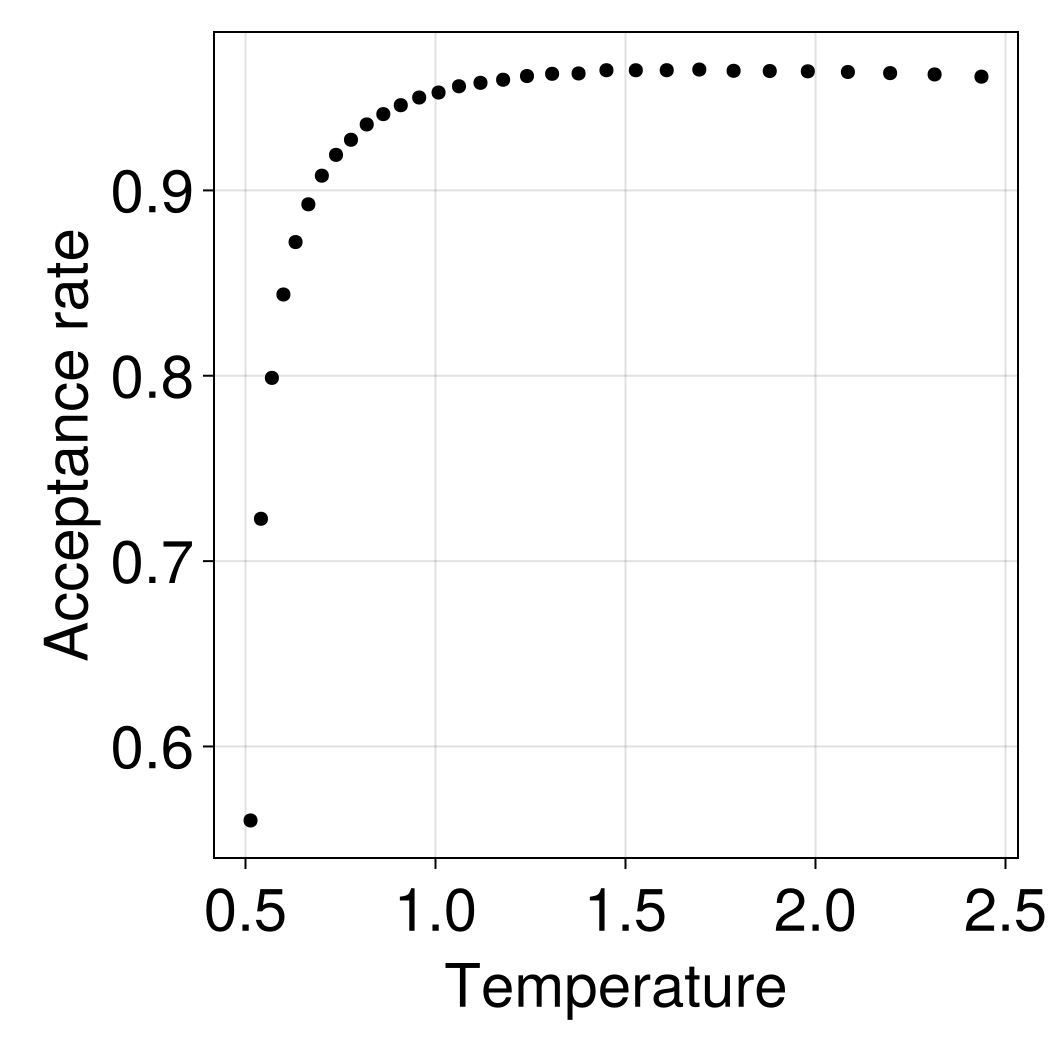

CairoMakie.Screen{IMAGE}


In [8]:
begin
    fig1 = Figure(size=(525, 525), fontsize = 30)
    ax1 = fig1[1, 1] = Axis(fig1, xlabel="Temperature", ylabel="Acceptance rate")
    
    T_mid = [(T_replicas[i] + T_replicas[i+1]) / 2 for i in 1:length(exchange_prob_means)]
    scatter!(ax1, T_mid, exchange_prob_means, color=:black, markersize=10)
    
    display(fig1)
end

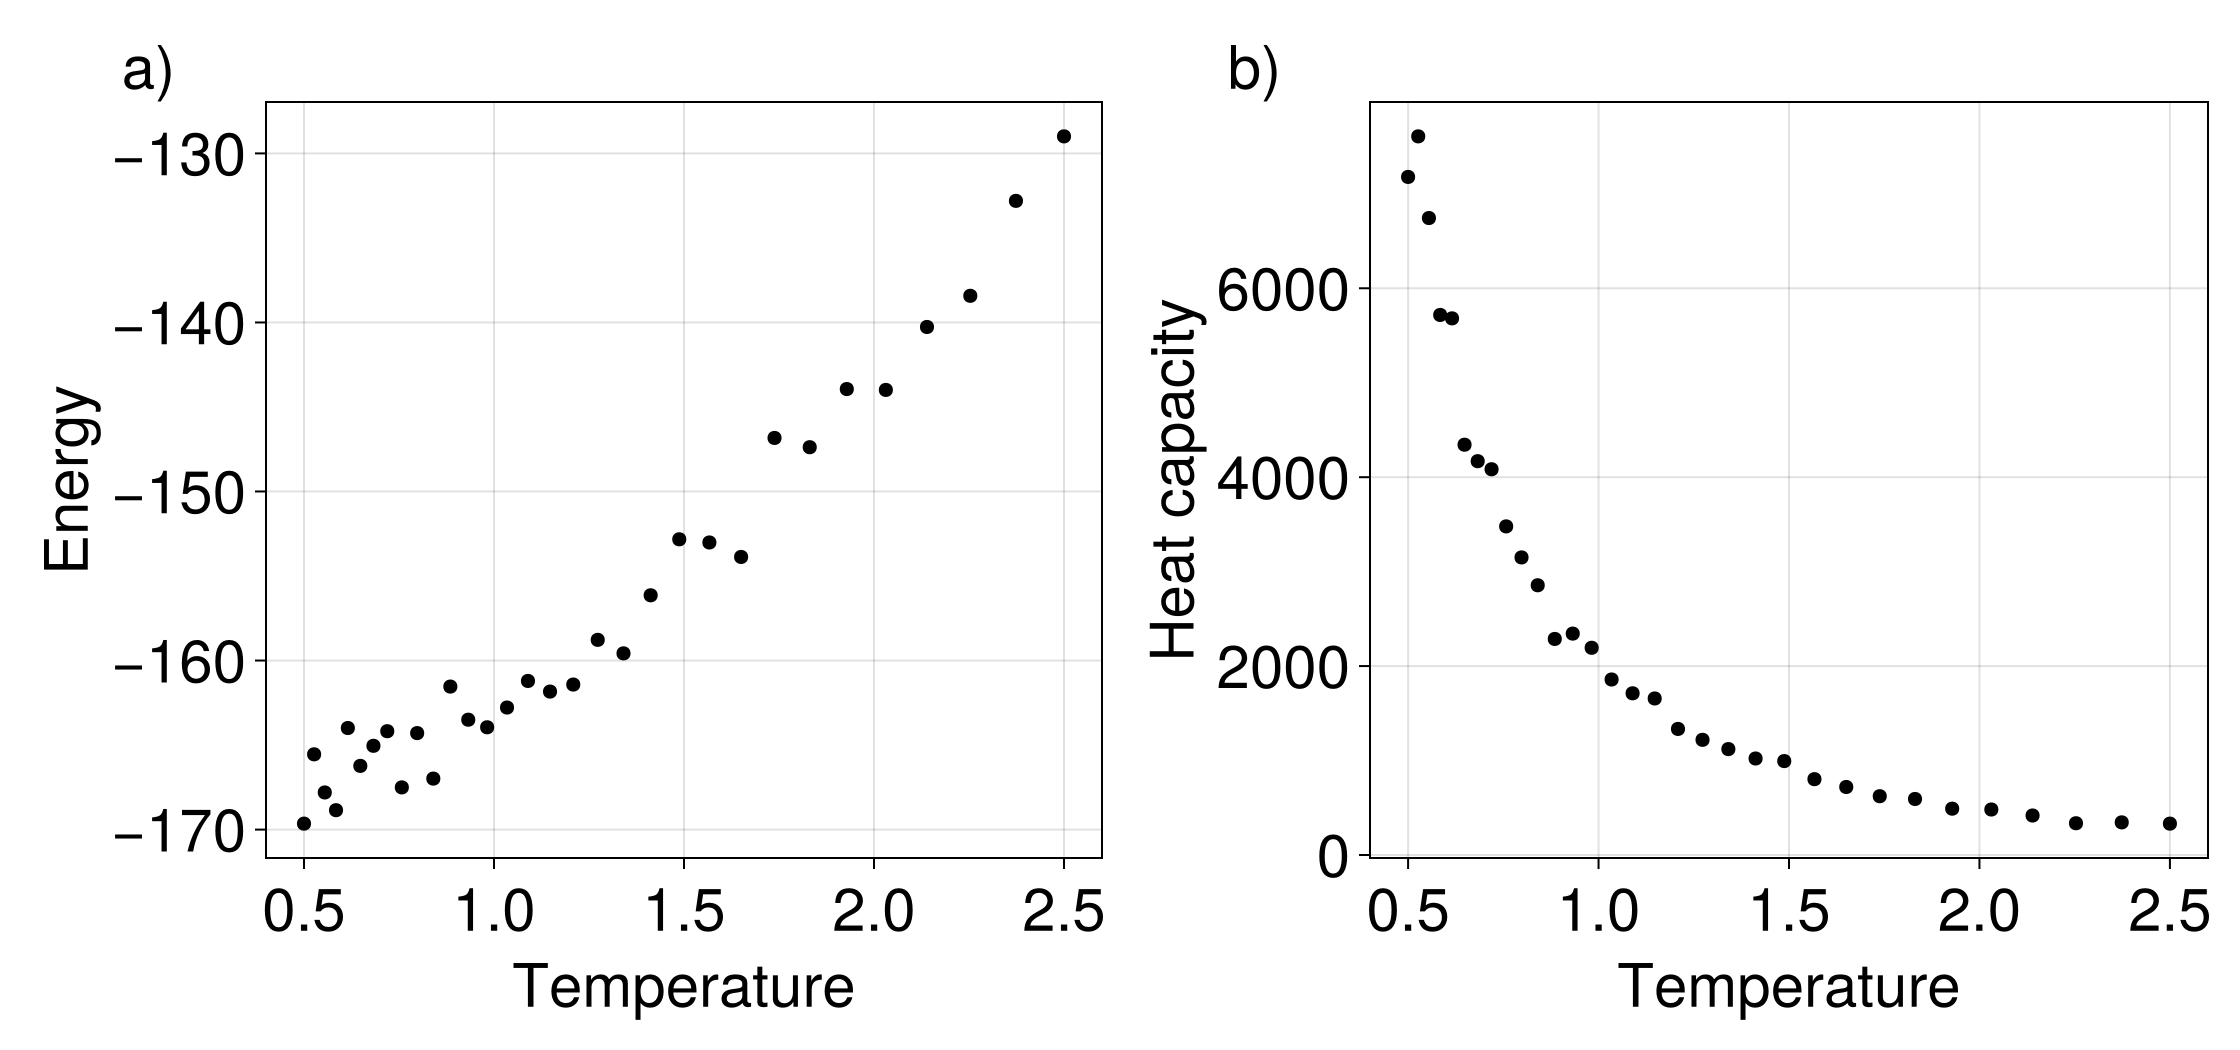

CairoMakie.Screen{IMAGE}


In [12]:
begin
    fig2 = Figure(size=(1120, 525), fontsize = 30)
    ax1 = fig2[1, 1] = Axis(fig2, xlabel="Temperature", ylabel="Energy")
    ax2 = fig2[1, 2] = Axis(fig2, xlabel="Temperature", ylabel="Heat capacity")
    Label(fig2[1, 1, TopLeft()], "a)");
    Label(fig2[1, 2, TopLeft()], "b)");

    scatter!(ax1, T_replicas, E, color=:black, markersize=10)
    scatter!(ax2, T_replicas, C, color=:black, markersize=10)

    display(fig2)
end

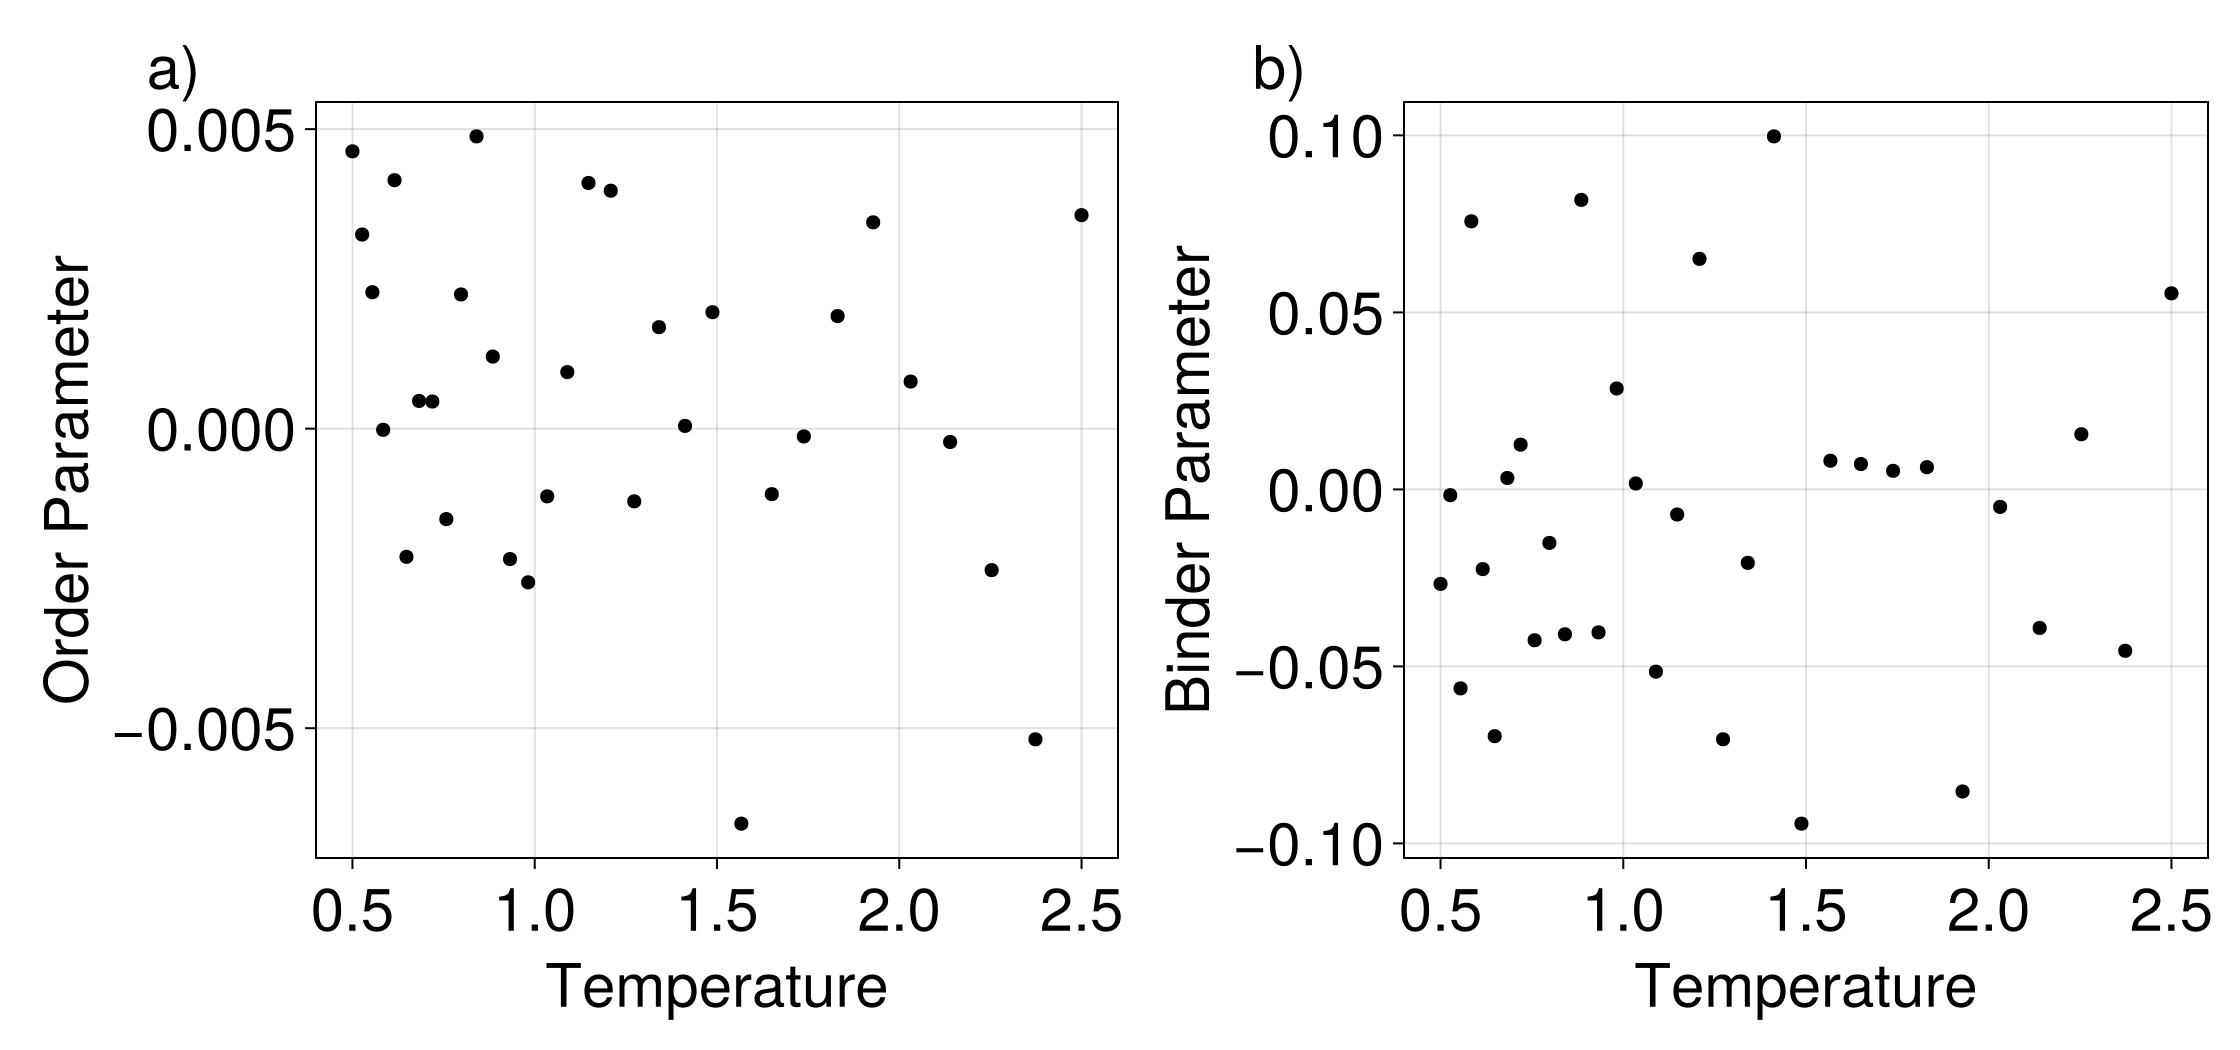

CairoMakie.Screen{IMAGE}


In [15]:
begin
    fig3 = Figure(size=(1120, 525), fontsize = 30)
    ax1 = fig3[1, 1] = Axis(fig3, xlabel="Temperature", ylabel="Order Parameter")
    ax2 = fig3[1, 2] = Axis(fig3, xlabel="Temperature", ylabel="Binder Parameter")
    Label(fig3[1, 1, TopLeft()], "a)");
    Label(fig3[1, 2, TopLeft()], "b)");

    scatter!(ax1, T_replicas, q_avg, color=:black, markersize=10)
    scatter!(ax2, T_replicas, Binder, color=:black, markersize=10)

    display(fig3)
end

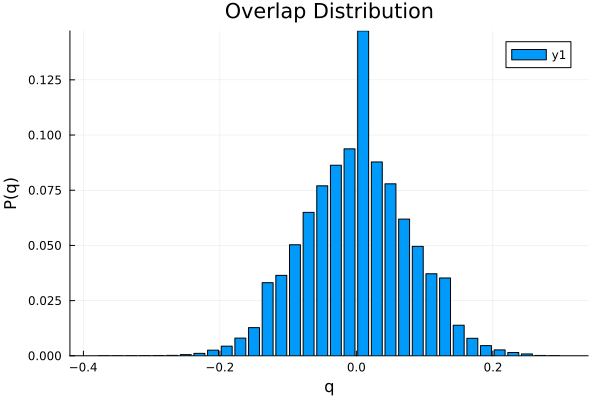

In [17]:
using StatsBase
using Plots

function compute_overlap_distribution(q_vals::Vector{Float64}; nbins::Int=50)
    hist = fit(Histogram, q_vals; nbins=nbins, closed=:left)
    edges = hist.edges[1]
    counts = hist.weights
    total = sum(counts)
    probs = counts ./ total
    bin_centers = (edges[1:end-1] .+ edges[2:end]) ./ 2
    return bin_centers, probs
end

all_q = vcat(q_values...)
bins, Pq = compute_overlap_distribution(all_q; nbins=50)

bar(bins, Pq, xlabel="q", ylabel="P(q)", title="Overlap Distribution")